# DISpANALYSIS

In [1]:
# Load the packages needed to run the scripts in this notebook
import numpy as np
import os
import pandas as pd
from pmoss.analysis import compute_diagnosis
from pmoss import create_combination
from pmoss.display import scatterplot_decrease_parameters, plot_pcurve_by_measure, composed_plot, table_of_results
from pmoss.models.exponential_fit import decission_data_exponential
from pmoss.loaders import morphoparam
# Avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Information about the data.
Provide path containing the data (csv or excel) and the name of the file. 

Note: The column identifying the group to which each value belongs to, must have the name "Condition" and should be the first column.

In [2]:
# path containing the data
path = '../data/morphology_taxol/'
path = "/Users/esti/Documents/PROYECTOS/3DPROTUCELL/pmoss/pMoSS/data/morphology_taxol"
# Name of the file containing the information. It can be a csv or excel file. 
# Note that the column containing the labels of the group must have the name "Condition" 
# and should be the first column of the file.

# You can read either a csv or excel files:
file_name ='cell_data.xlsx'

### Estimation of the p-value function 

Initialization parameters

In [3]:
# number of "n-values" to evaluate (size of N-grid)
grid_size = 100 
# minimum "n-value" to compute Monte Carlo cross-validation
n0 = 2 
# maximum "n-value" to compute Monte Carlo cross-validation
Nmax = 2500

# This value prevents from having only one iteration for the highest "n-value":
# final iterations = k*(m/min(m,Nmax)) where m is the size of group with less observations. 
k = 20 

# This value prevents from having millions of iterations in n0 (the lowest"n-value"):
# initial iterations = np.log((m/n0)*initial_portion) where m is the size of group with less observations. 
initial_portion= 1/15.



Parameters for the calculation of the decision index

In [4]:
alpha = 0.05 # alpha for a 100(1-alpha) statistical significance.
gamma = 5e-06 # gamma in the paper = gamma*alpha.
# Statistitical test to evaluate
test = 'MannWhitneyU'
# Method to estimate the p-value function
method = 'exponential'

Estimation of the p-value function and assesment of the decision index.

In [5]:
pvalues, param, Theta = compute_diagnosis(file_name, path = path, gamma = gamma,
                                          alpha = alpha, grid_size = grid_size,
                                          n0 = n0, Nmax = Nmax,k = k,
                                          initial_portion=initial_portion,
                                          method = method, test = test)

/Users/esti/Documents/PROYECTOS/3DPROTUCELL/pmoss/pMoSS/data/morphology_taxol
cell_data.xlsx
comparison: HD_control_HD_tax1
Cross validation with N =  2  and folds =  2589  finished.
Cross validation with N =  3  and folds =  2547  finished.
Cross validation with N =  4  and folds =  2506  finished.
Cross validation with N =  5  and folds =  2465  finished.
Cross validation with N =  6  and folds =  2425  finished.
Cross validation with N =  7  and folds =  2385  finished.
Cross validation with N =  8  and folds =  2347  finished.
Cross validation with N =  9  and folds =  2308  finished.
Cross validation with N =  10  and folds =  2271  finished.
Cross validation with N =  11  and folds =  2234  finished.
Cross validation with N =  12  and folds =  2197  finished.
Cross validation with N =  13  and folds =  2162  finished.
Cross validation with N =  14  and folds =  2126  finished.
Cross validation with N =  15  and folds =  2092  finished.
Cross validation with N =  16  and folds =  

Cross validation with N =  148  and folds =  1217  finished.
Cross validation with N =  158  and folds =  1197  finished.
Cross validation with N =  169  and folds =  1177  finished.
Cross validation with N =  182  and folds =  1158  finished.
Cross validation with N =  195  and folds =  1139  finished.
Cross validation with N =  209  and folds =  1121  finished.
Cross validation with N =  223  and folds =  1103  finished.
Cross validation with N =  239  and folds =  1085  finished.
Cross validation with N =  257  and folds =  1067  finished.
Cross validation with N =  275  and folds =  1050  finished.
Cross validation with N =  295  and folds =  1032  finished.
Cross validation with N =  316  and folds =  1016  finished.
Cross validation with N =  338  and folds =  999  finished.
Cross validation with N =  362  and folds =  983  finished.
Cross validation with N =  388  and folds =  967  finished.
Cross validation with N =  416  and folds =  951  finished.
Cross validation with N =  4

Save the results

In [6]:
# Save computed parameters
pvalues.to_csv(os.path.join(path, "cell_morphology_pvalues.csv"), index = False)

## Plot of results

In [7]:
# Load the data

## Write the path and file_nameif it's different from the previous one or you will compute the analysis from here
# path = "../data/morphology_taxol/"
# file_name = "cell_data.xlsx"

# Load the computed p-values
df = pd.read_csv(os.path.join(path, 'cell_morphology_pvalues.csv'), sep = ',')

# Obtain the data, variables and name of the groups for which you would like to get a plot
data, variables, group_labels = morphoparam(file_name, path = path)

# You can create all the combinations from a dictionary with the labels of each group, or declare which combinations you want:
# 1.- All combinations should be written exactly as in the csv of the p-values.
combination = create_combination(group_labels)

# Calculate the data related to exponential parameters:
param = decission_data_exponential(df, combination, variables, sign_level = 0.05, gamma = 5e-06)

/Users/esti/Documents/PROYECTOS/3DPROTUCELL/pmoss/pMoSS/data/morphology_taxol
cell_data.xlsx


In [8]:
# print the results:
table = table_of_results(param, variables, combination)
table

,comparison,Cell body size microns a,Cell body size microns c,Cell body size microns ^n-alpha,Cell body size microns n-alpha,Cell body size microns Theta,Cell body perimeter microns a,Cell body perimeter microns c,Cell body perimeter microns ^n-alpha,Cell body perimeter microns n-alpha,...,Cell body axis ratio a,Cell body axis ratio c,Cell body axis ratio ^n-alpha,Cell body axis ratio n-alpha,Cell body axis ratio Theta,protrusion_binary a,protrusion_binary c,protrusion_binary ^n-alpha,protrusion_binary n-alpha,protrusion_binary Theta
0,HD_control_HD_tax1,0.526470,0.002648,1171,888.0,0,0.525528,0.001689,1771,1392.0,...,0.529580,0.002949,1020,800.0,0,0.499080,1.155359e-16,NaN,1.991365e+16,0
1,HD_control_HD_tax50,0.541493,0.007742,388,307.0,0,0.522056,0.001366,2178,1716.0,...,0.609959,0.044517,69,56.0,0,0.205850,3.781139e-02,42.0,3.700000e+01,1
2,HD_tax1_HD_tax50,0.574003,0.023649,129,103.0,0,0.538803,0.007320,388,324.0,...,0.648765,0.074071,42,34.0,1,0.200116,3.831505e-02,42.0,3.600000e+01,1


Cell body size microns


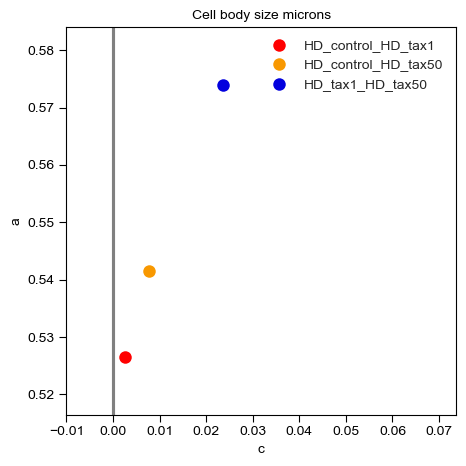

Cell body perimeter microns


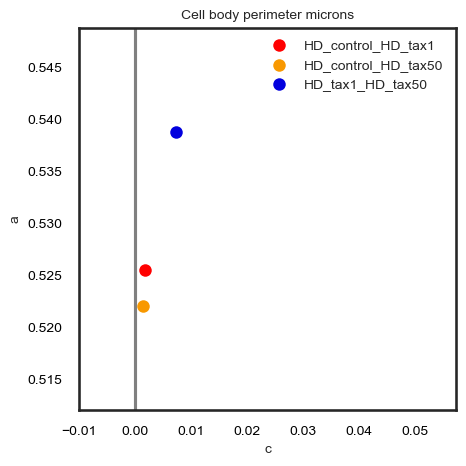

Cell body axis ratio


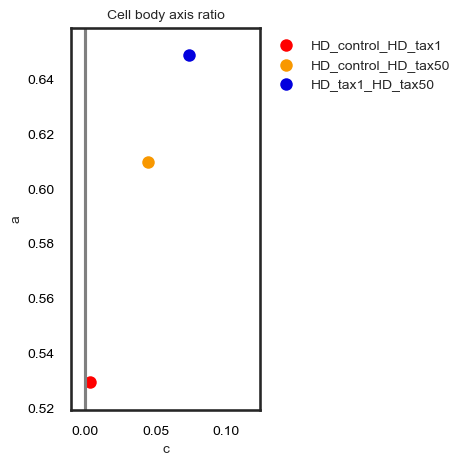

protrusion_binary


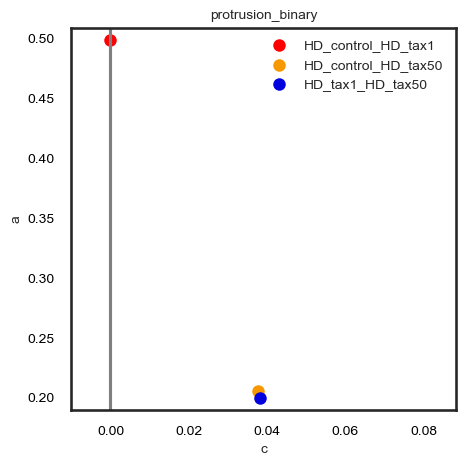

In [9]:
# Plot exponential parameters a and c from p(n) = aexp(-cn) 
colors = ['#FF0000', '#F89800', '#0200DE']
scatterplot_decrease_parameters(df, combination,variables, path = path, fs = 10, width = 5, height = 5,
                                plot_type="exp-param", colors = colors)

Cell body size microns


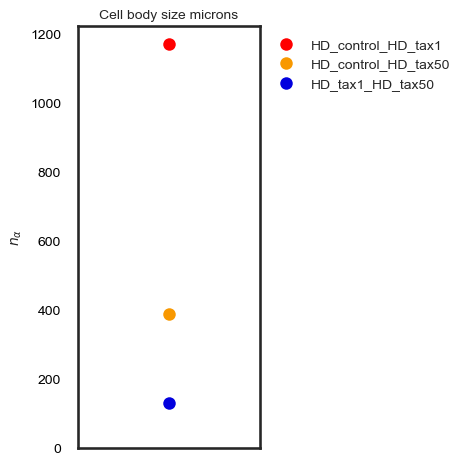

Cell body perimeter microns


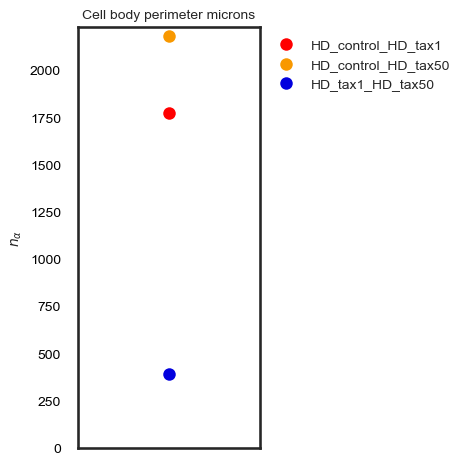

Cell body axis ratio


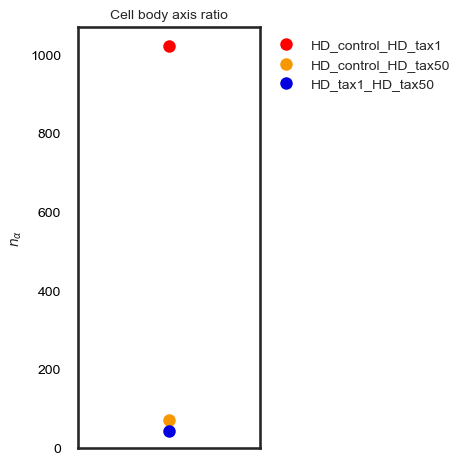

protrusion_binary


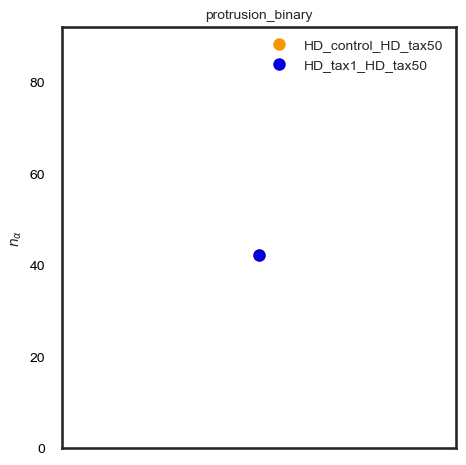

In [10]:
# Plot the estimator of the minimum sample size to observe statistically significant differences.
scatterplot_decrease_parameters(df, combination,variables, path = path, fs = 10, width = 5, height = 5,
                                plot_type="sampled-nalpha", colors = colors)

Cell body size microns


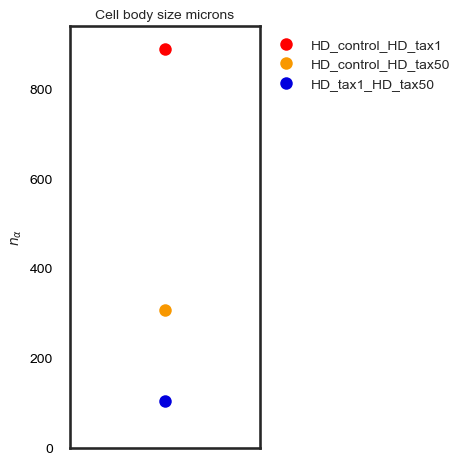

Cell body perimeter microns


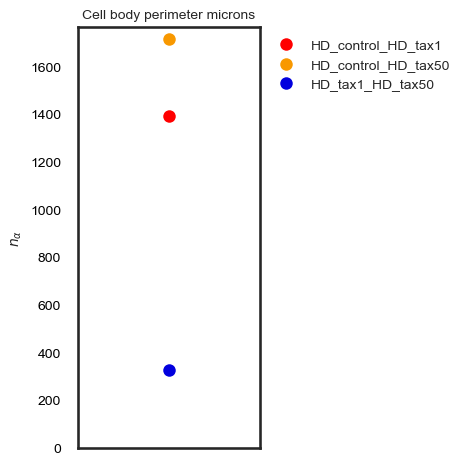

Cell body axis ratio


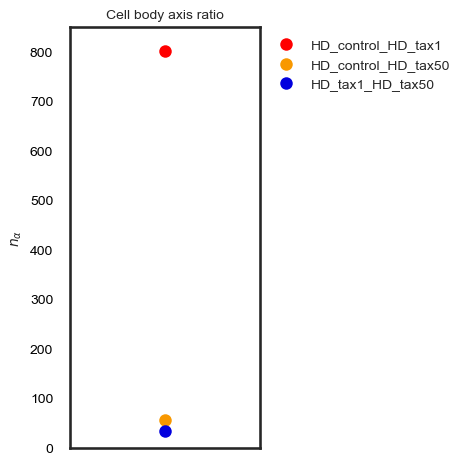

protrusion_binary


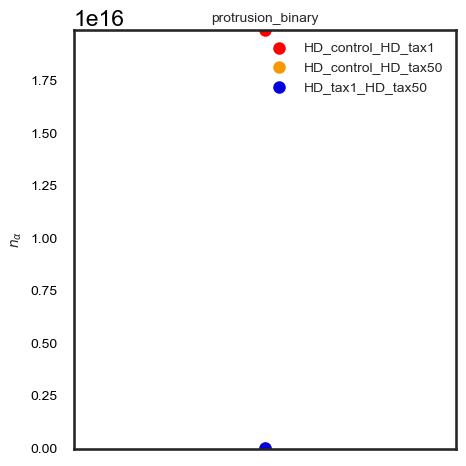

In [11]:
# Plot the sample size n that satisfies alpha = aexp(-cn). This value is the theoretical minimum sample size needed to observe statistically significant differences.
scatterplot_decrease_parameters(df, combination,variables, path = path, fs = 10, width = 5, height = 5,
                                plot_type="theory-nalpha", colors = colors)

Cell body size microns


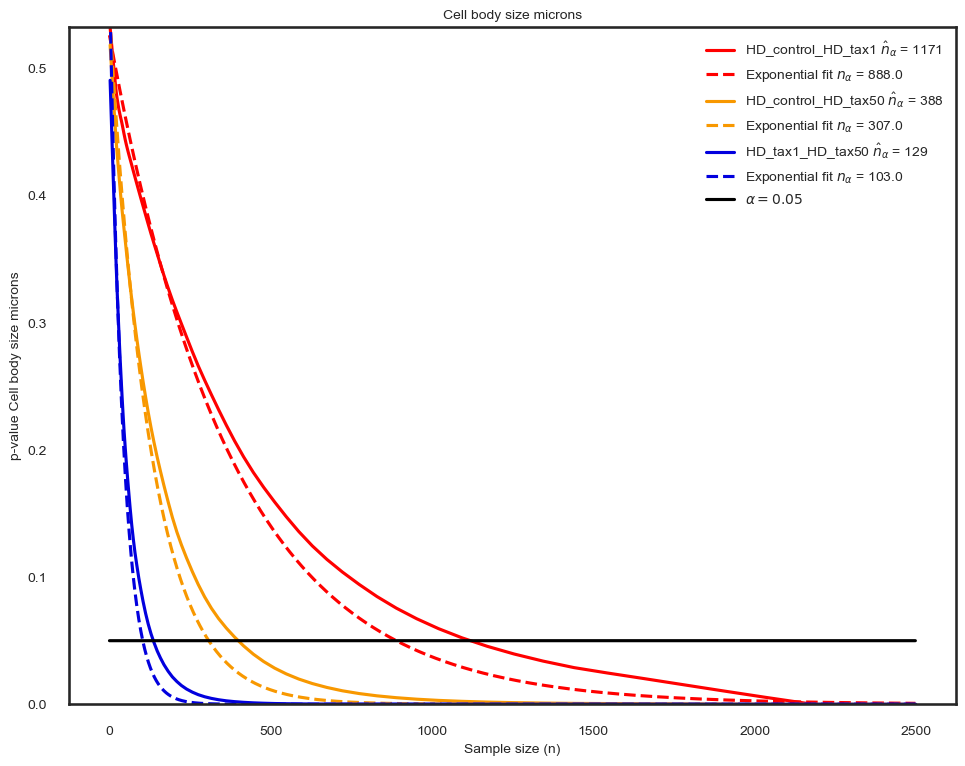

Cell body perimeter microns


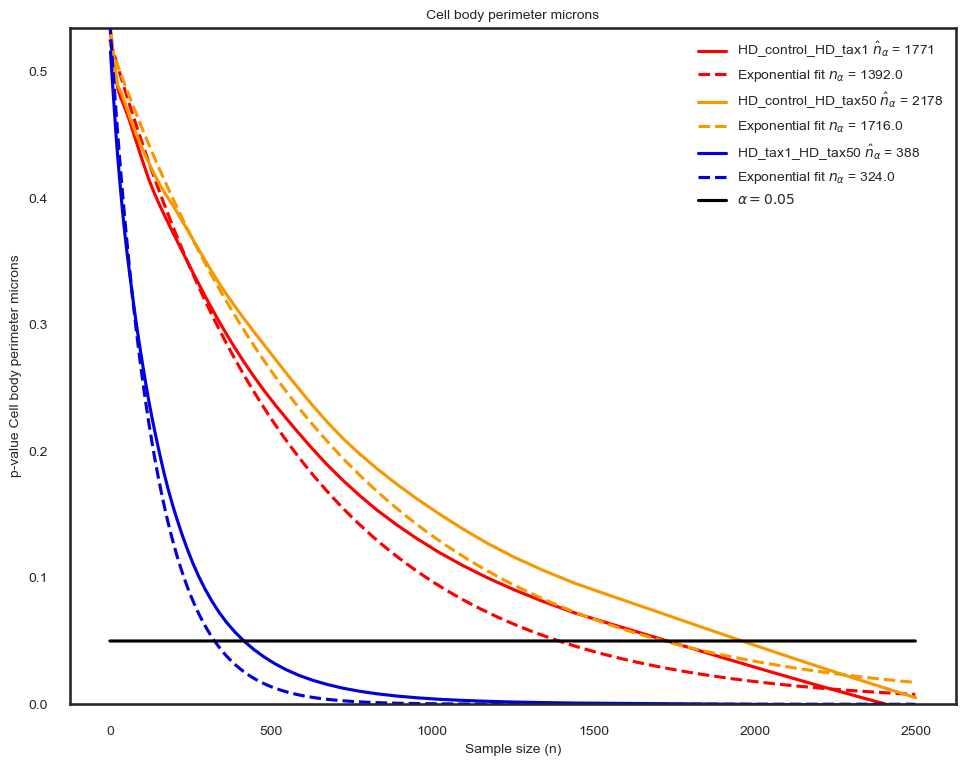

Cell body axis ratio


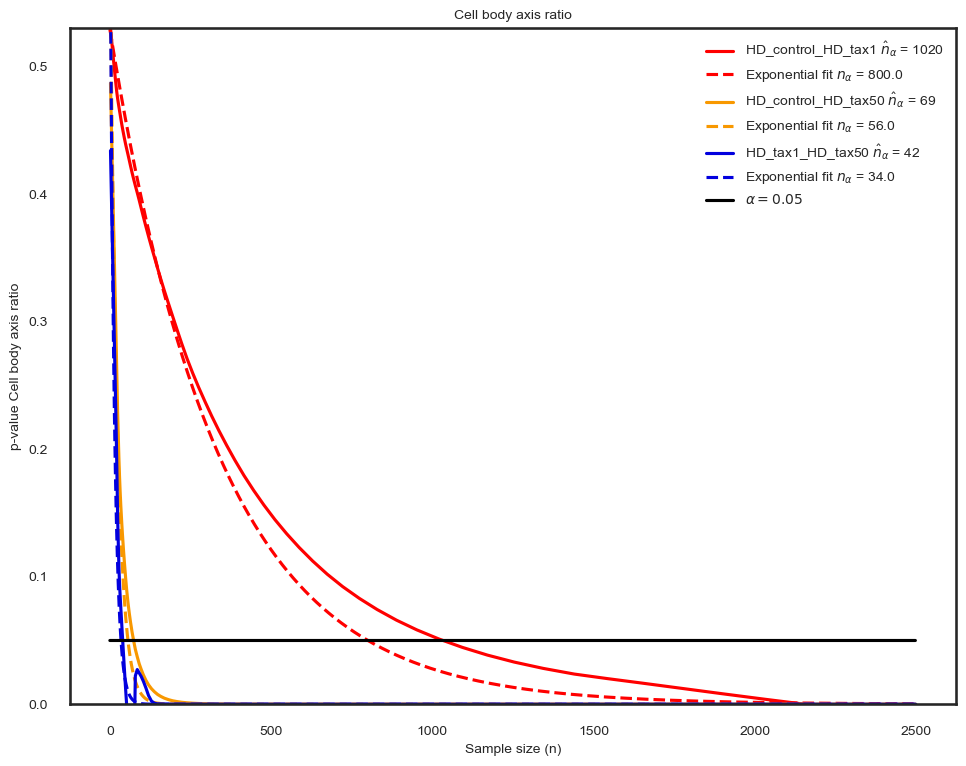

In [12]:
# Plot the p-function for continuous measures
colors = ['#FF0000', '#F89800', '#0200DE']
continuous_variables = {i:variables[i] for i in variables if variables[i]!='protrusion_binary'}
plot_pcurve_by_measure(df, combination, continuous_variables, path = path, colors = colors)

Cell body size microns


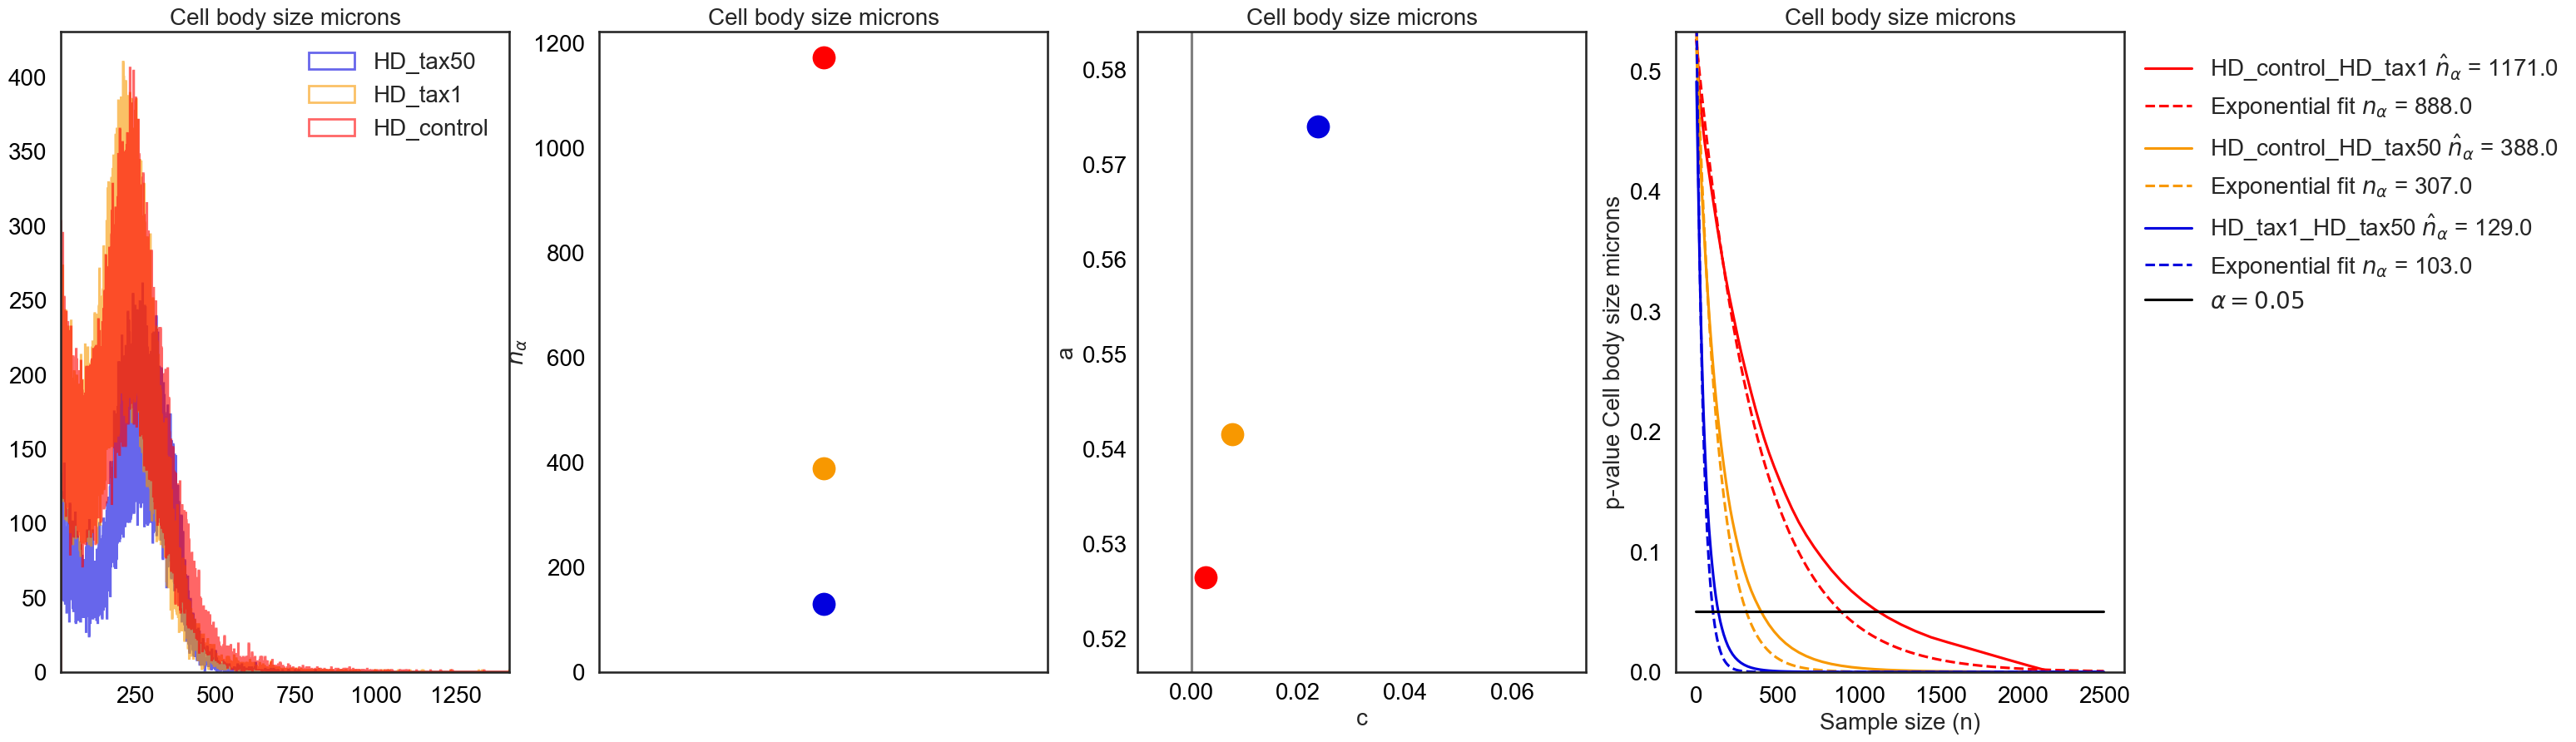

Cell body perimeter microns


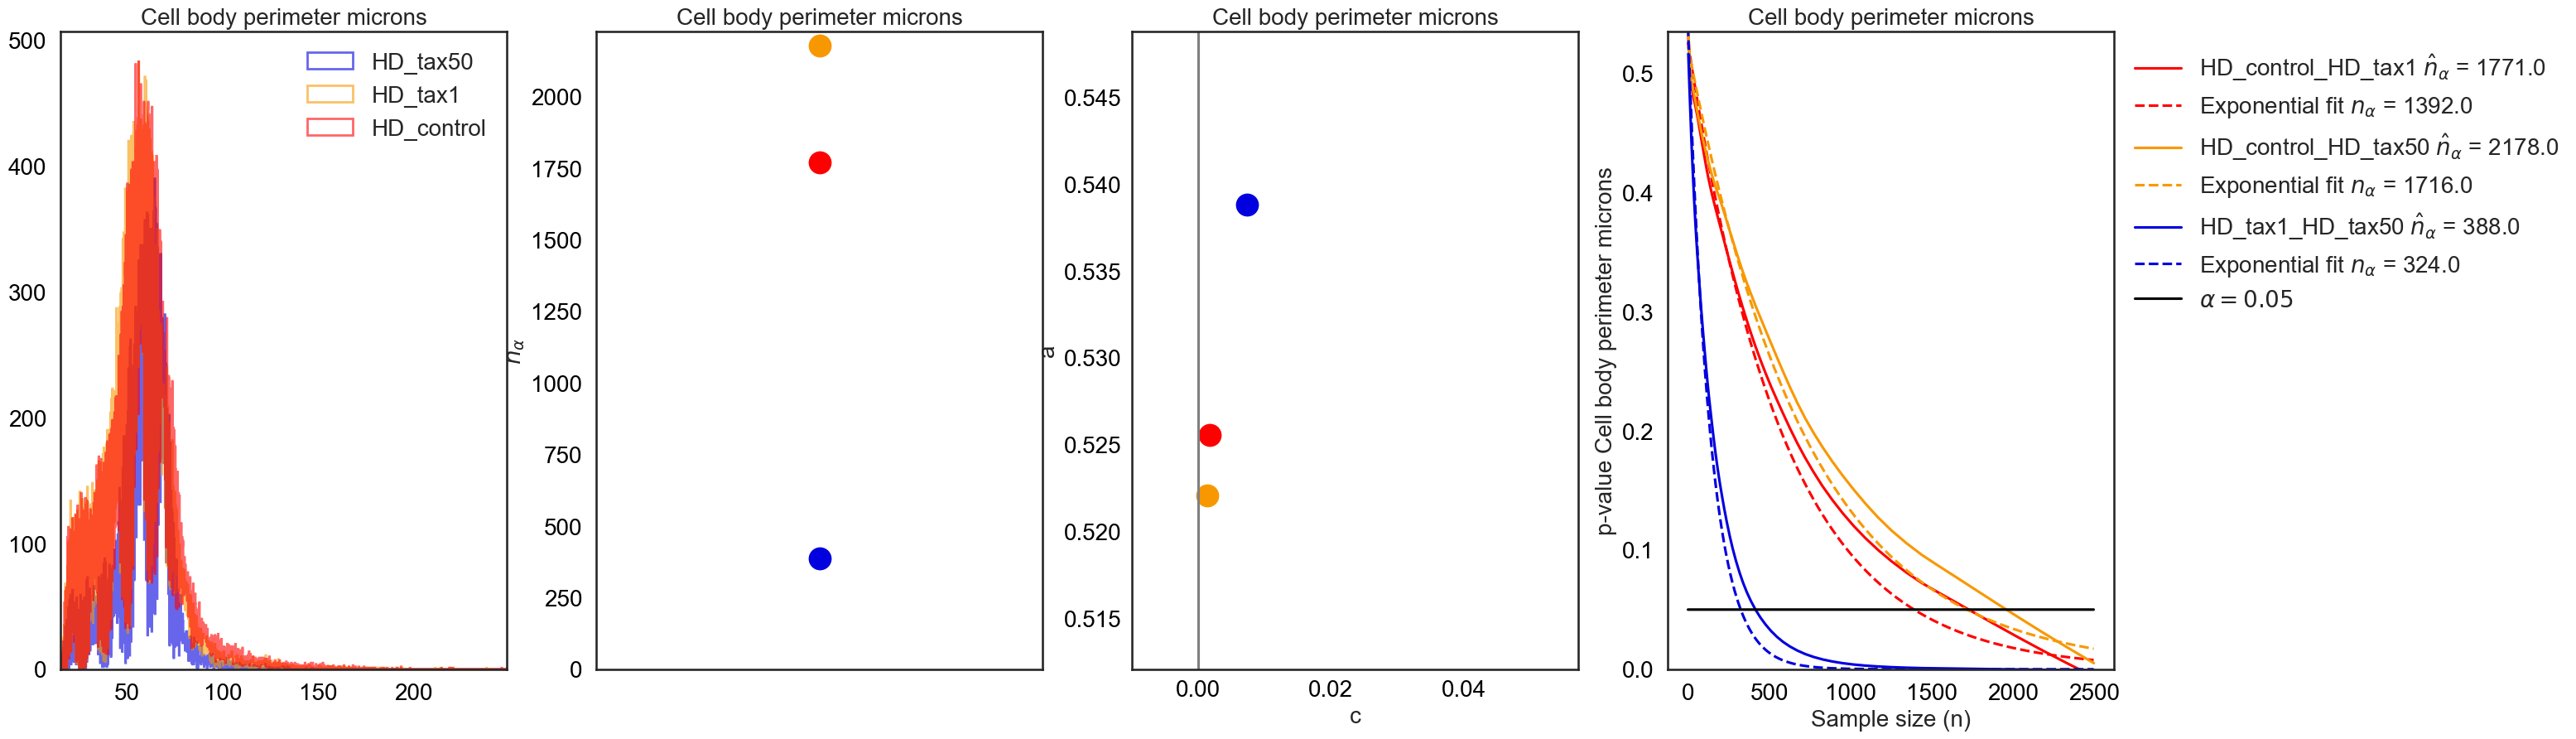

Cell body axis ratio


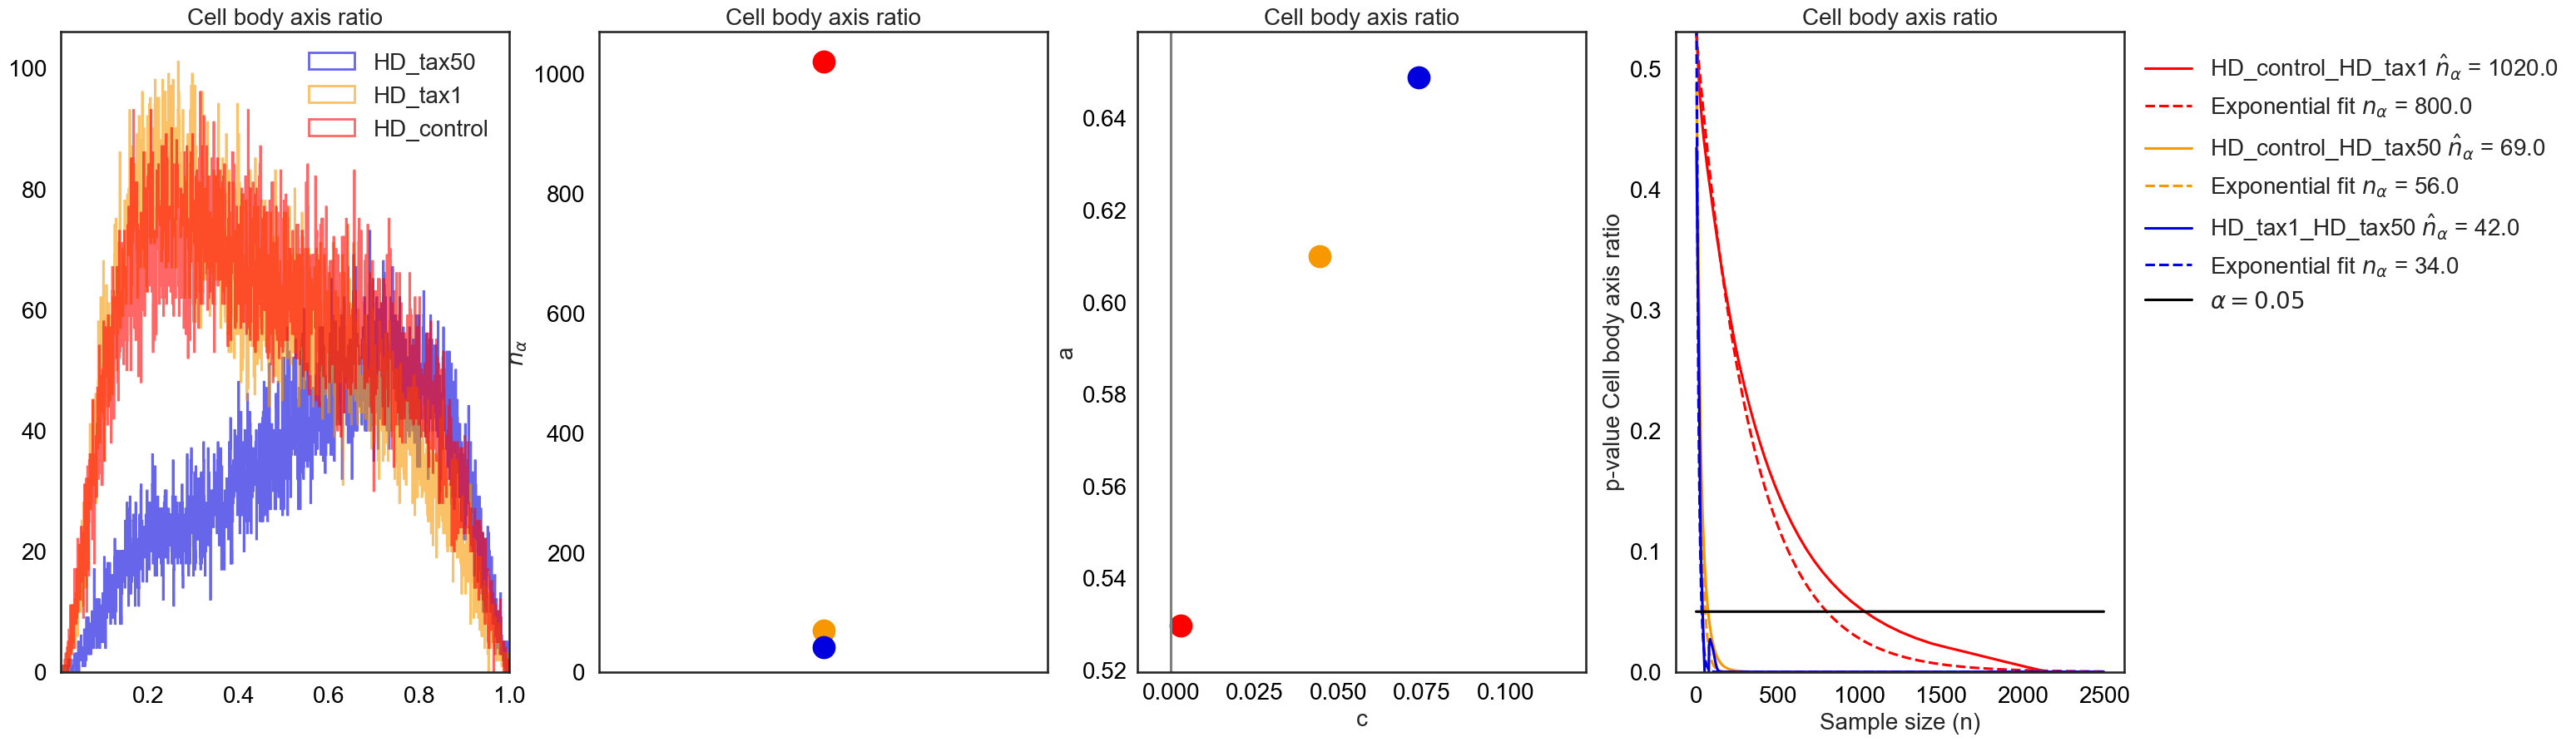

In [13]:
# Plot the p-function for continuous measures
colors = ['#FF0000', '#F89800', '#0200DE']
continuous_variables = {i:variables[i] for i in variables if variables[i]!='protrusion_binary'}
composed_plot(data, df, group_labels, combination, continuous_variables, colors = colors, 
              fs = 20, width = 32, height = 10, bins = 1500)

protrusion_binary


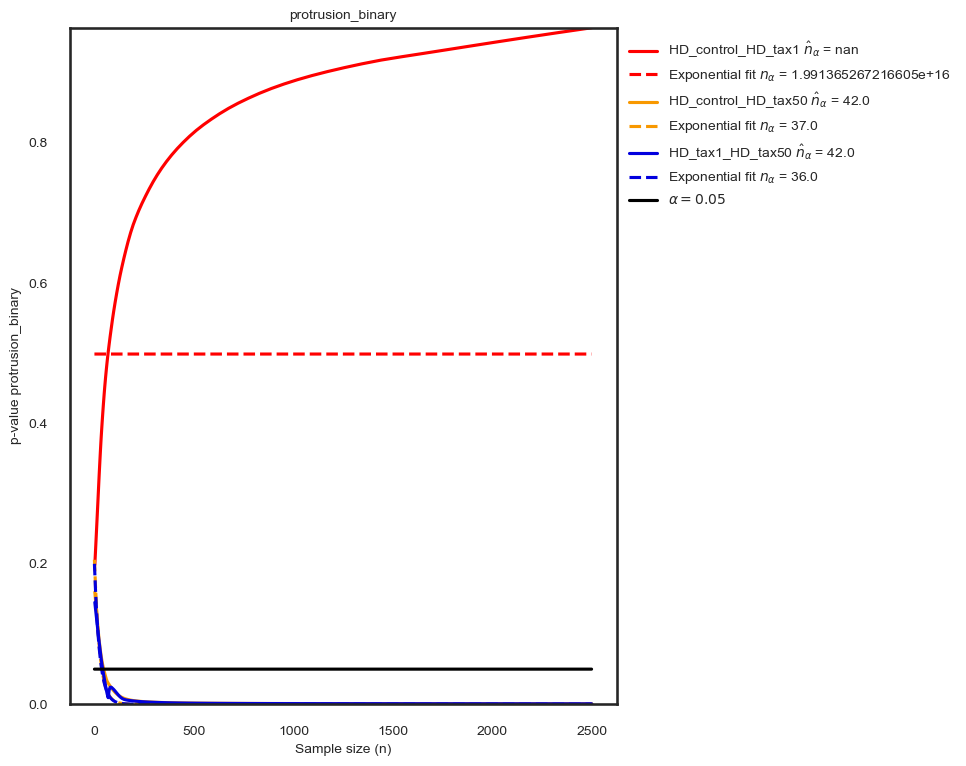

In [14]:
# Plot the p-function for discrete variables measures
discrete_variables = {'0': 'protrusion_binary'}
test={'0': 'ChiSquared'}
plot_pcurve_by_measure(df, combination, discrete_variables, path = path, test = test, colors = colors)

protrusion_binary


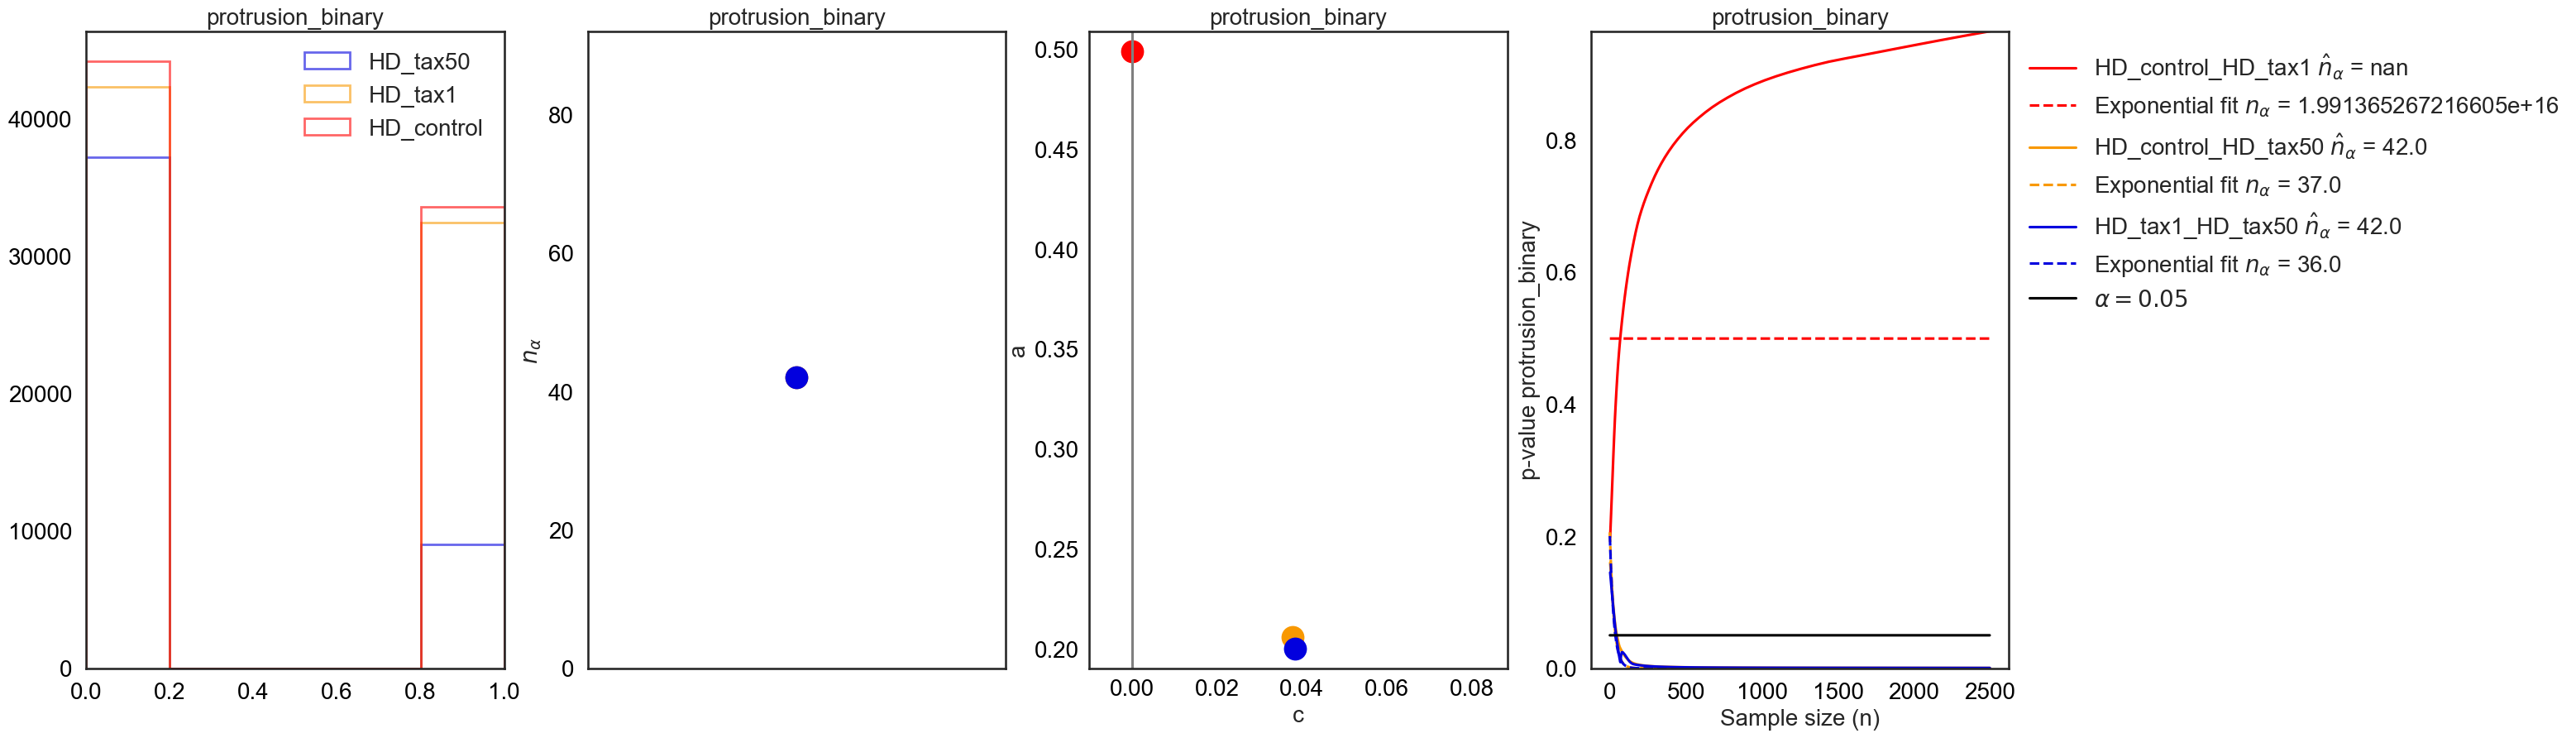

In [15]:
# Plot the p-function for discrete variables measures
discrete_variables = {'0': 'protrusion_binary'}
test={'0': 'ChiSquared'}
composed_plot(data, df, group_labels, combination, discrete_variables, test = test, 
              colors = colors, fs = 20, width = 30, height = 10, bins = 5)